In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

In [ ]:
from sklearn.datasets import load_breast_cancer

# Dataset
cancer_data = load_breast_cancer()
data = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
data['diagnosis'] = cancer_data.target  # Add target column
data['diagnosis'] = data['diagnosis'].map({0: 'Malignant', 1: 'Benign'})  # Map target to labels
print(data.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [ ]:
# Check null values
print(data.isnull().sum())

# Description
print(data.describe())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    5

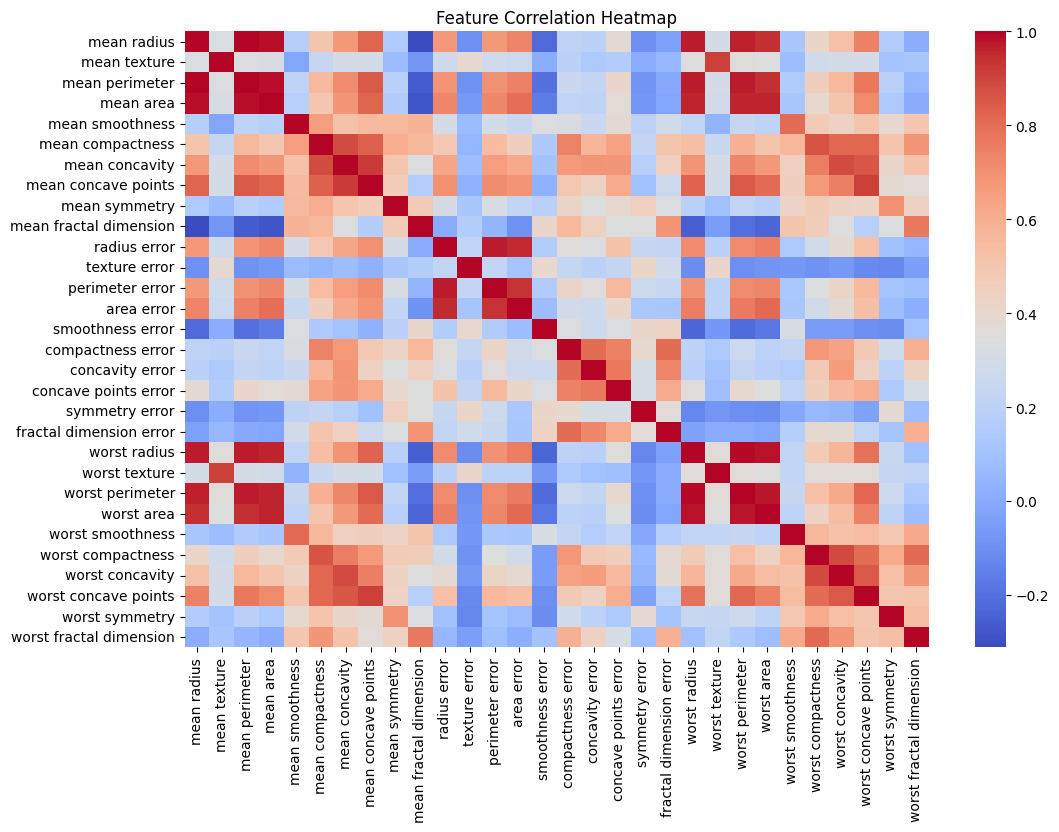

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = data.drop(columns=['diagnosis']).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

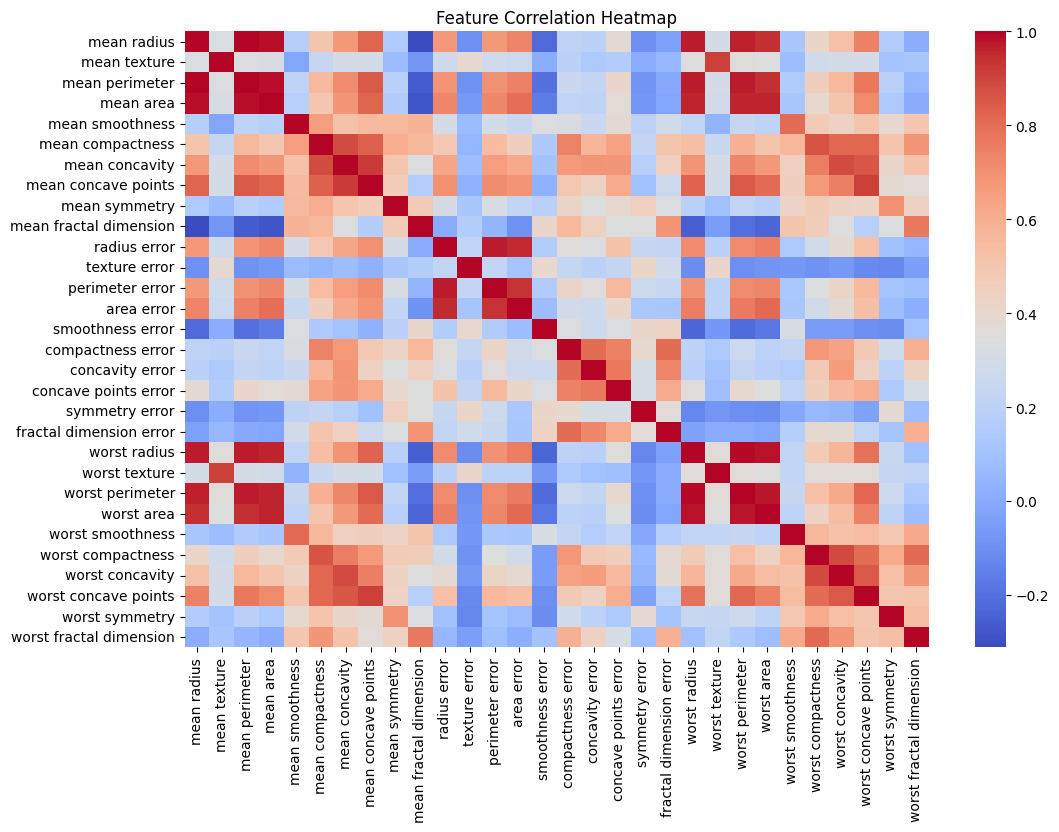

In [ ]:
plt.figure(figsize=(12, 8))
num_cols = data.select_dtypes(include=['number'])
sns.heatmap(num_cols.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

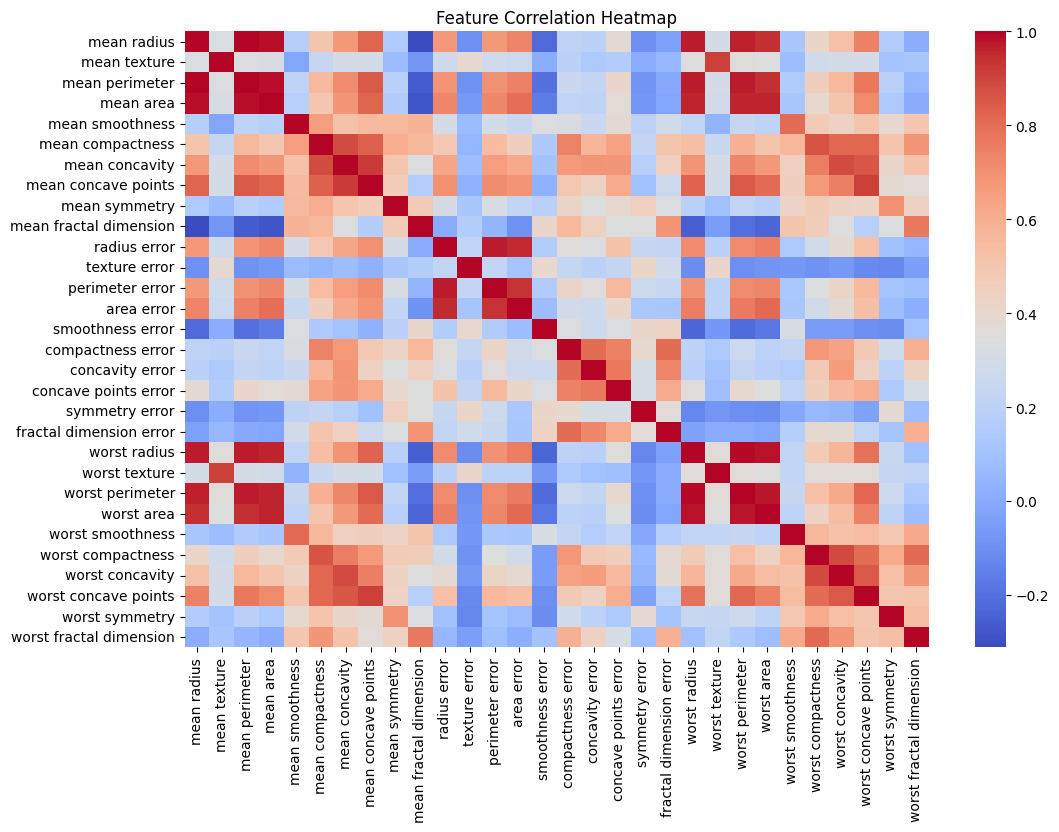

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

<ipython-input-54-fbd2d44b3a4f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data, palette='Set2')


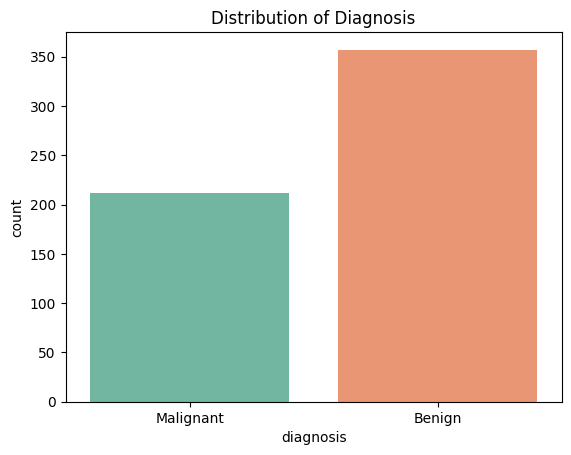

In [ ]:
sns.countplot(x='diagnosis', data=data, palette='Set2')
plt.title("Distribution of Diagnosis")
plt.show()

In [ ]:
X = data[cancer_data.feature_names]
y = data['diagnosis'].map({'Malignant': 0, 'Benign': 1})

# 2. Divide
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Crea y entrena el pipeline de LR
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42, max_iter=1000)
)
model.fit(X_train, y_train)

# 4. Predice y mide accuracy
y_pred   = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 97.37%


In [ ]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42, max_iter=1000)
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
for name, y_pred in [('Random Forest', y_pred_rf), ('Logistic Regression', y_pred_lr)]:
    print(f"\n=== {name} ===")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Malignant','Benign']))



=== Random Forest ===
Accuracy : 0.9649122807017544
Precision: 0.958904109589041
Recall   : 0.9859154929577465
F1 Score : 0.9722222222222222
Confusion Matrix:
[[40  3]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.98      0.93      0.95        43
      Benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


=== Logistic Regression ===
Accuracy : 0.9736842105263158
Precision: 0.9722222222222222
Recall   : 0.9859154929577465
F1 Score : 0.9790209790209791
Confusion Matrix:
[[41  2]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.98      0.95      0.96        43
      Benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.9

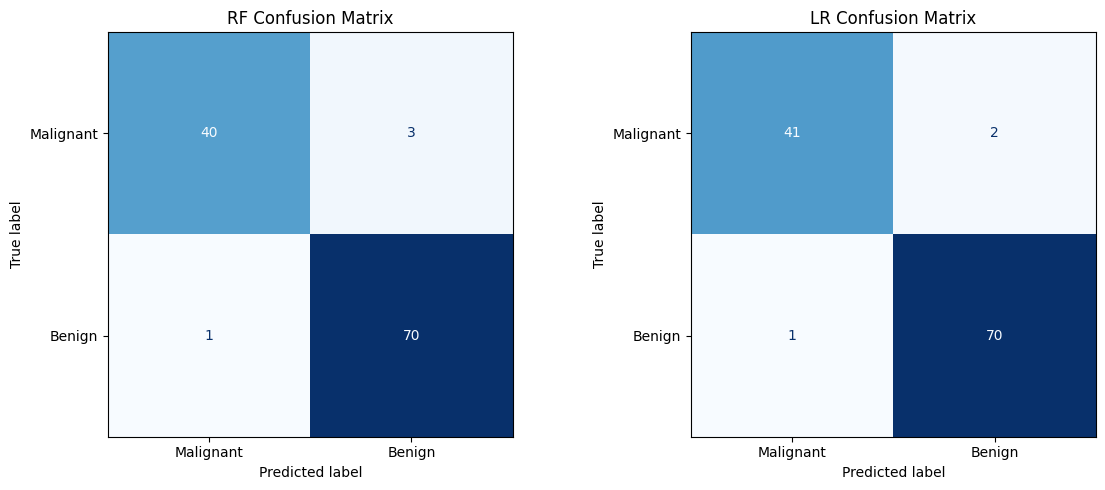

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
for ax, (model, y_pred) in zip(axes, [('RF', y_pred_rf), ('LR', y_pred_lr)]):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred,
        display_labels=['Malignant','Benign'],
        cmap='Blues',
        ax=ax,
        colorbar=False
    )
    ax.set_title(f"{model} Confusion Matrix")
plt.tight_layout()
plt.show()

In [ ]:
def eval_metrics(name, y_true, y_pred):
    return {
        'Modelo': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

resultados = [
    eval_metrics('Random Forest',      y_test, y_pred_rf),
    eval_metrics('Logistic Regression', y_test, y_pred_lr)
]

df_res = pd.DataFrame(resultados)
print(df_res.to_string(index=False))

             Modelo  Accuracy  Precision   Recall  F1 Score
      Random Forest  0.964912   0.958904 0.985915  0.972222
Logistic Regression  0.973684   0.972222 0.985915  0.979021


In [ ]:
#Validación cruzada
from sklearn.model_selection import cross_val_score

for mdl, nombre in [(rf, 'RF'), (lr, 'LR')]:
    scores = cross_val_score(mdl, X, y, cv=5, scoring='f1')
    print(f"{nombre} F1 CV: {scores.mean():.3f} ± {scores.std():.3f}")

#Curvas ROC‑AUC
from sklearn.metrics import roc_auc_score

y_prob_rf = rf.predict_proba(X_test)[:,1]
y_prob_lr = lr.predict_proba(X_test)[:,1]

print("RF AUC:", roc_auc_score(y_test, y_prob_rf))
print("LR AUC:", roc_auc_score(y_test, y_prob_lr))


RF F1 CV: 0.965 ± 0.018
LR F1 CV: 0.985 ± 0.005
RF AUC: 0.9952505732066819
LR AUC: 0.99737962659679


In [ ]:
from statsmodels.stats.contingency_tables import mcnemar
# y_test: tus etiquetas verdaderas (0/1)
# y_pred_rf, y_pred_lr: predicciones de RF y LR (0/1)

# Contamos los cuatro grupos:
both_correct         = np.sum((y_pred_rf == y_test) & (y_pred_lr == y_test))
rf_correct_lr_wrong  = np.sum((y_pred_rf == y_test) & (y_pred_lr != y_test))
rf_wrong_lr_correct  = np.sum((y_pred_rf != y_test) & (y_pred_lr == y_test))
both_wrong           = np.sum((y_pred_rf != y_test) & (y_pred_lr != y_test))

# Tabla en forma [[a, b],
#                [c, d]]
# donde b = casos RF acierta y LR falla,
#       c = casos RF falla y LR acierta
table = [
    [both_correct,        rf_correct_lr_wrong],
    [rf_wrong_lr_correct, both_wrong]
]
print("Contingency table:\n", table)

Contingency table:
 [[np.int64(109), np.int64(1)], [np.int64(2), np.int64(2)]]


In [ ]:
result = mcnemar(table, exact=True)  # exact=False usa aproximación chi-cuadrado
print(f"Estadístico: {result.statistic:.3f}, p‑valor: {result.pvalue:.3f}")

alpha = 0.05
if result.pvalue < alpha:
    print("⇒ La diferencia es estadísticamente significativa (rechazamos H₀).")
else:
    print("⇒ No hay evidencia para diferenciar ambos modelos (fallan igual).")

Estadístico: 1.000, p‑valor: 1.000
⇒ No hay evidencia para diferenciar ambos modelos (fallan igual).


<ipython-input-66-041d5b716614>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


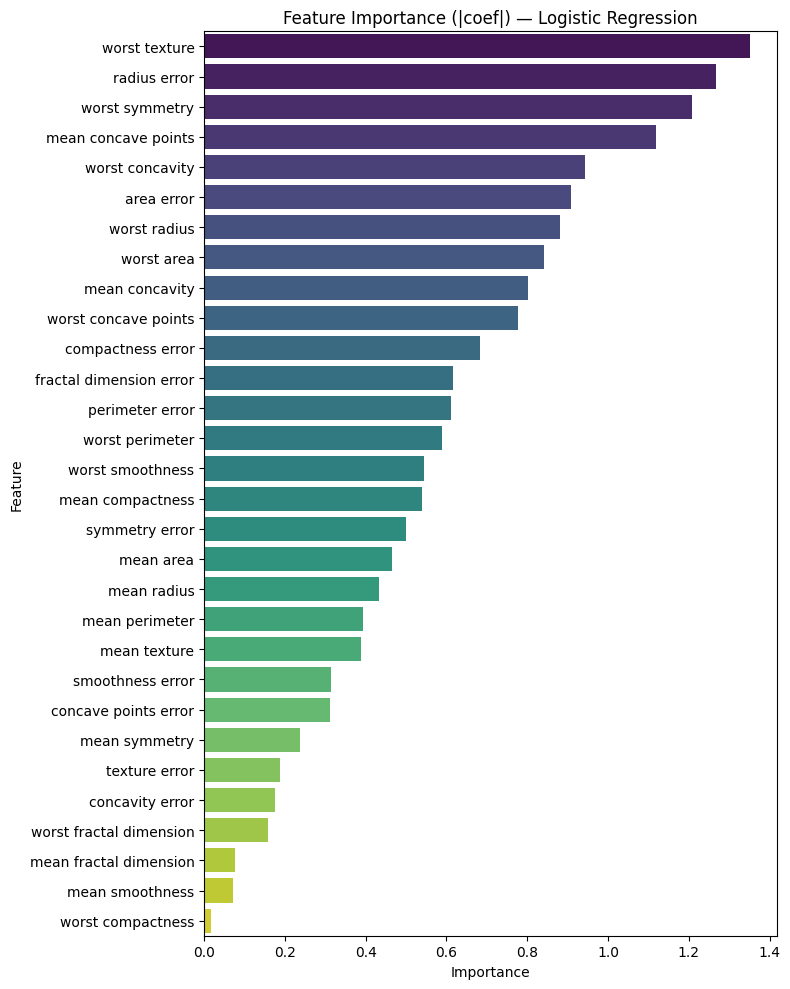

In [ ]:
# Extrae los coeficientes de la regresión logística
# Si usas make_pipeline, el paso se llama 'logisticregression'
coef = lr.named_steps['logisticregression'].coef_[0]

# Crea un DataFrame con valor absoluto de coeficiente como “importancia”
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(coef)
}).sort_values(by='Importance', ascending=False)

# Grafica en barras
plt.figure(figsize=(8,10))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance (|coef|) — Logistic Regression")
plt.tight_layout()
plt.show()


In [ ]:
#new px
new_patient = np.array([[14.5, 20.8, 96.7, 700.0, 0.09, 0.15, 0.2, 0.1, 0.2, 0.06,
                         0.5, 1.2, 3.0, 35.0, 0.007, 0.03, 0.05, 0.02, 0.02, 0.005,
                         16.0, 25.0, 105.0, 800.0, 0.12, 0.21, 0.3, 0.15, 0.25, 0.08]])

new_patient_df = pd.DataFrame(new_patient, columns=cancer_data.feature_names)
prediction = model.predict(new_patient_df)

if prediction[0] == 0:
    print("The tumor is likely Malignant.")
else:
    print("The tumor is likely Benign.")

new_px_2 = np.array([[
    12.0, 15.5, 78.3, 450.0, 0.08, 0.12, 0.15, 0.08, 0.18, 0.05,
    0.4, 1.0, 2.5, 25.0, 0.005, 0.02, 0.04, 0.015, 0.02, 0.004,
    14.0, 18.0, 90.0, 500.0, 0.10, 0.18, 0.25, 0.12, 0.22, 0.07
]])
new_df_2 = pd.DataFrame(new_px_2, columns=cancer_data.feature_names)
pred2 = model.predict(new_df_2)
print("The tumor is likely", "Malignant" if pred2[0]==0 else "Benign")

new_px_3 = np.array([[
    22.0, 30.0, 150.0, 1600.0, 0.15, 0.20, 0.30, 0.20, 0.25, 0.08,
    0.7, 2.0, 4.0, 60.0, 0.010, 0.05, 0.08, 0.03, 0.03, 0.006,
    24.0, 32.0, 165.0, 1700.0, 0.18, 0.25, 0.35, 0.22, 0.30, 0.10
]])
new_df_3 = pd.DataFrame(new_px_3, columns=cancer_data.feature_names)
pred3 = model.predict(new_df_3)
print("The tumor is likely", "Malignant" if pred3[0]==0 else "Benign")

The tumor is likely Malignant.
The tumor is likely Benign
The tumor is likely Malignant
